# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/dataset.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [59]:
import numpy as np

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']


### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [60]:
for i in range(1, 41):
    print('Probek w klasie:', i, sum(train[:, 0] == i))

print('')

# alternatywna opcja: vstring
for i in range(1, 41):
    print(f'probek w klasie {i} jest {sum(train[:, 0] == i)}')

Probek w klasie: 1 77
Probek w klasie: 2 66
Probek w klasie: 3 55
Probek w klasie: 4 66
Probek w klasie: 5 77
Probek w klasie: 6 44
Probek w klasie: 7 44
Probek w klasie: 8 33
Probek w klasie: 9 121
Probek w klasie: 10 88
Probek w klasie: 11 88
Probek w klasie: 12 77
Probek w klasie: 13 99
Probek w klasie: 14 66
Probek w klasie: 15 66
Probek w klasie: 16 0
Probek w klasie: 17 0
Probek w klasie: 18 0
Probek w klasie: 19 0
Probek w klasie: 20 0
Probek w klasie: 21 0
Probek w klasie: 22 121
Probek w klasie: 23 77
Probek w klasie: 24 77
Probek w klasie: 25 66
Probek w klasie: 26 99
Probek w klasie: 27 55
Probek w klasie: 28 66
Probek w klasie: 29 110
Probek w klasie: 30 77
Probek w klasie: 31 77
Probek w klasie: 32 66
Probek w klasie: 33 66
Probek w klasie: 34 99
Probek w klasie: 35 88
Probek w klasie: 36 33
Probek w klasie: 37 0
Probek w klasie: 38 0
Probek w klasie: 39 0
Probek w klasie: 40 0

probek w klasie 1 jest 77
probek w klasie 2 jest 66
probek w klasie 3 jest 55
probek w klasie 4

### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [15]:
klasy = [3,5]

train_new = train[ np.isin(train[:, 0 ], klasy) ]
test_new = test[ np.isin(test[:, 0 ], klasy) ]

# albo tak
train_new = train[ (train[:, 0] == 3) | (train[:, 0] == 5) ]
test_new = test[ (test[:, 0] == 3) | (test[:, 0] == 5) ]

### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje moduł zawieracjący funkcje przydatne do wizualizacji danych z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples): # iteracja po grupach
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
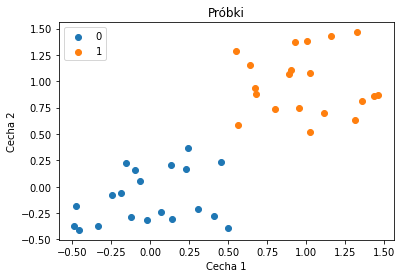

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

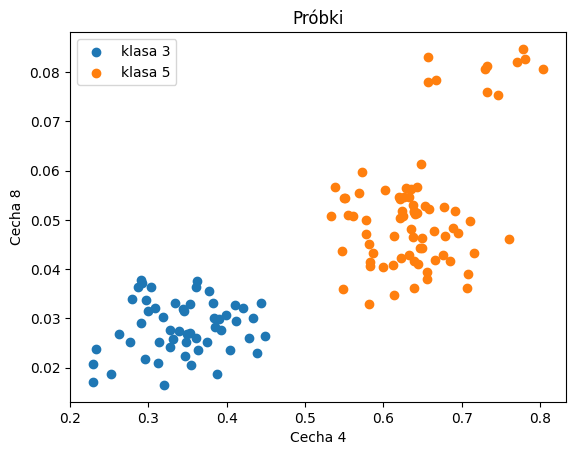

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 4")
plt.ylabel(f"Cecha 8")

for kl in [3, 5]:
    probki_kl = train[train[:, 0] == kl]
    x_kl = probki_kl[:, 4]
    y_kl = probki_kl[:, 8]
    plt.scatter(x_kl, y_kl, label=f'klasa {kl}')


# plt.scatter([1, 2, 3, 4], [5, 4, 3, 2])
# x_kl3 = probki_klasy_3[:, 4]
# y_kl3 = probki_klasy_3[:, 8]
# plt.scatter(x_kl3, y_kl3, label='klasa 3')

# x_kl5 = probki_klasy_5[:, 4]
# y_kl5 = probki_klasy_5[:, 8]
# plt.scatter(x_kl5, y_kl5, label='klasa 5')

plt.legend()

### Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktem `x` oraz `y` uwzględniający wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$

In [72]:
features = [1, 2] # kolumny o indeksach 1, 2
x = [0, 2, 3]
y = [0, 5, 6]

def edist(x, y, features):
     return sum([(x[i] - y[i])**2 for i in features])**0.5

edist(x, y, features) # wynik: 4.242640687119285

4.242640687119285

### Zadanie 6

Zaimplementuj klasyfikator najbliższego sąsiada. 
1. Oblicz odległość każdego elementu ze zbioru _testowego_ do każdego elementu ze zbioru _treningowego_. 
2. Odnajdź taki element ze zbioru _treningowego_, którego odległość do klasyfikowanego elementu (ze zbioru _testowego_) jest najmniejsza.
3. Przypisz klasyfikowanemu elementowi klasę.


In [74]:
def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def nn_classifier(train, test):
    predicted_classes = []
    for test_sample in test:
        test_features = test_sample[1:]

        distances = []
        for train_sample in train:
            train_features = train_sample[1:]
            distance = euclidean_distance(test_features, train_features)
            distances.append((distance, train_sample[0]))

        nearest_neighbor_class = sorted(distances, key=lambda x: x[0])[0][1]
        predicted_classes.append(nearest_neighbor_class)
    
    return np.array(predicted_classes)

predicted_classes = nn_classifier(train, test)

for i, (true_class, predicted_class) in enumerate(zip(test[:, 0], predicted_classes)):
    print(f"Test sample {i + 1}: True class = {true_class}, Predicted class = {predicted_class}")
        

Test sample 1: True class = 31.0, Predicted class = 34.0
Test sample 2: True class = 32.0, Predicted class = 26.0
Test sample 3: True class = 31.0, Predicted class = 34.0
Test sample 4: True class = 2.0, Predicted class = 32.0
Test sample 5: True class = 30.0, Predicted class = 9.0
Test sample 6: True class = 13.0, Predicted class = 24.0
Test sample 7: True class = 28.0, Predicted class = 14.0
Test sample 8: True class = 33.0, Predicted class = 3.0
Test sample 9: True class = 9.0, Predicted class = 26.0
Test sample 10: True class = 27.0, Predicted class = 9.0
Test sample 11: True class = 3.0, Predicted class = 26.0
Test sample 12: True class = 13.0, Predicted class = 30.0
Test sample 13: True class = 33.0, Predicted class = 13.0
Test sample 14: True class = 34.0, Predicted class = 34.0
Test sample 15: True class = 31.0, Predicted class = 34.0
Test sample 16: True class = 11.0, Predicted class = 11.0
Test sample 17: True class = 8.0, Predicted class = 8.0
Test sample 18: True class = 14

### Zadanie 7
Przeprowadź klasyfikację liści wybranych wcześniej (dwóch) klas korzystając z własnej implementacji modelu kNN, a następnie wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każdą klasę w innym kolorze, a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

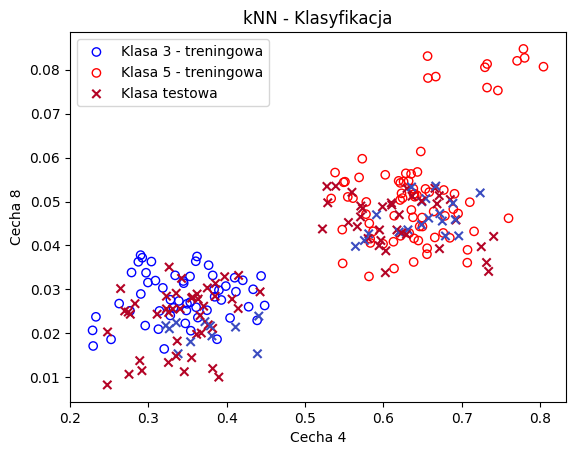

In [117]:
import numpy as np
import matplotlib.pyplot as plt

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

def knn_classifier(train, test, k=3):
    predicted_classes = []
    for test_sample in test:
        test_features = test_sample[1:]

        distances = []
        for train_sample in train:
            train_features = train_sample[1:]
            distance = euclidean_distance(test_features, train_features)
            distances.append((distance, train_sample[0]))

        nearest_neighbors = sorted(distances, key=lambda x: x[0])[:k]
        nearest_neighbors_classes = [neighbor[1] for neighbor in nearest_neighbors]
        
        predicted_class = max(nearest_neighbors_classes, key=nearest_neighbors_classes.count)
        predicted_classes.append(predicted_class)
    
    return np.array(predicted_classes)

# wybrane klasy: 3 - Populus nigra, 5 - Quercus robur
train_class3 = train[train[:, 0] == 3]
train_class5 = train[train[:, 0] == 5]
test_class3 = test[test[:, 0] == 3]
test_class5 = test[test[:, 0] == 5]

train_data = np.concatenate([train_class3, train_class5], axis=0)
test_data = np.concatenate([test_class3, test_class5], axis=0)

predicted_classes = knn_classifier(train_data, test_data, k=3)

plt.scatter(train_class3[:, 4], train_class3[:, 8],  marker='o', label='Klasa 3 - treningowa', facecolors='none', edgecolors='blue')
plt.scatter(train_class5[:, 4], train_class5[:, 8], marker='o', label='Klasa 5 - treningowa', facecolors='none', edgecolors='red')

plt.scatter(test_data[:, 4], test_data[:, 8], c=predicted_classes, cmap='coolwarm', marker='x', label='Klasa testowa')

plt.xlabel('Cecha 4')
plt.ylabel('Cecha 8')
plt.title('kNN - Klasyfikacja')
plt.legend()
plt.show()

### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [104]:
true_classes = test_data[:, 0]
correctly_classified = (true_classes == predicted_classes).sum()
total_samples = len(test_data)
accuracy = (correctly_classified / total_samples) * 100 
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 42.73%


### Zadanie 9

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.


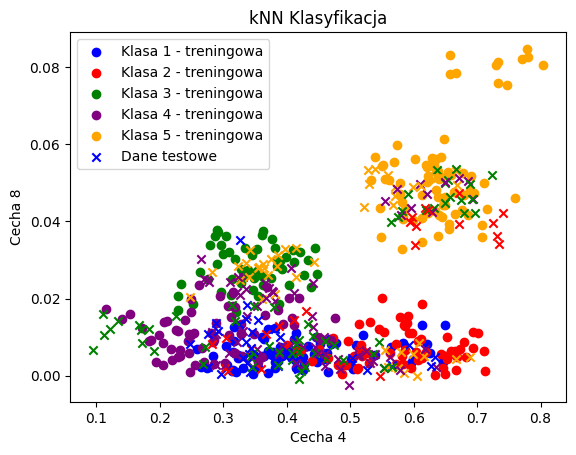

In [135]:
train_class1 = train[train[:, 0] == 1]
train_class2 = train[train[:, 0] == 2]
train_class3 = train[train[:, 0] == 3]
train_class4 = train[train[:, 0] == 4]
train_class5 = train[train[:, 0] == 5]

test_class1 = test[test[:, 0] == 1]
test_class2 = test[test[:, 0] == 2]
test_class3 = test[test[:, 0] == 3]
test_class4 = test[test[:, 0] == 4]
test_class5 = test[test[:, 0] == 5]

train_data = np.concatenate([train_class1, train_class2, train_class3, train_class4, train_class5], axis=0)
test_data = np.concatenate([test_class1, test_class2, test_class3, test_class4, test_class5], axis=0)

predicted_classes = knn_classifier(train_data, test_data, k=3)

colors = {1: 'blue', 2: 'red', 3: 'green', 4: 'purple', 5: 'orange'}

plt.scatter(train_class1[:, 4], train_class1[:, 8], c='blue', marker='o', label='Klasa 1 - treningowa', facecolors='none', edgecolors='blue')
plt.scatter(train_class2[:, 4], train_class2[:, 8], c='red', marker='o', label='Klasa 2 - treningowa', facecolors='none', edgecolors='red')
plt.scatter(train_class3[:, 4], train_class3[:, 8], c='green', marker='o', label='Klasa 3 - treningowa', facecolors='none', edgecolors='green')
plt.scatter(train_class4[:, 4], train_class4[:, 8], c='purple', marker='o', label='Klasa 4 - treningowa', facecolors='none', edgecolors='purple')
plt.scatter(train_class5[:, 4], train_class5[:, 8], c='orange', marker='o', label='Klasa 5 - treningowa', facecolors='none', edgecolors='orange')

# plt.scatter(test_data[:, 4], test_data[:, 8], c=predicted_classes, cmap='coolwarm', marker='x', label='Dane testowe')
for i, test_sample in enumerate(test_data):
    predicted_class = predicted_classes[i]
    plt.scatter(test_sample[4], test_sample[8], c=colors[predicted_class], marker='x', label=f'Dane testowe' if i == 0 else "")

plt.xlabel('Cecha 4')
plt.ylabel('Cecha 8')
plt.title('kNN Klasyfikacja')
plt.legend()
plt.show()


### Zadanie 10

Przeprowadź eksperyment ponownie dla takich samych parametrów jak w zad. 9, ale większej losowo wybranej liczby cech: 3, 5, 10.

> W tym przypadku nie wyświetlaj wykresu a jedynie oblicz dokładność klasyfikacji.

In [139]:
num_features = random.choice([3, 5, 10])
print(f"Losowo wybrana liczba cech: {num_features}")

train_class1 = train[train[:, 0] == 1]
train_class2 = train[train[:, 0] == 2]
train_class3 = train[train[:, 0] == 3]
train_class4 = train[train[:, 0] == 4]
train_class5 = train[train[:, 0] == 5]

test_class1 = test[test[:, 0] == 1]
test_class2 = test[test[:, 0] == 2]
test_class3 = test[test[:, 0] == 3]
test_class4 = test[test[:, 0] == 4]
test_class5 = test[test[:, 0] == 5]

train_data = np.concatenate([train_class1, train_class2, train_class3, train_class4, train_class5], axis=0)
test_data = np.concatenate([test_class1, test_class2, test_class3, test_class4, test_class5], axis=0)

def calculate_accuracy(true_classes, predicted_classes):
    correct = np.sum(true_classes == predicted_classes)
    accuracy = (correct / len(true_classes)) * 100
    return accuracy

train_features = train_data[:, 1:num_features+1]
test_features = test_data[:, 1:num_features+1]

predicted_classes = knn_classifier(train_features, test_features, k=3)

true_classes = test_data[:, 0]
accuracy = calculate_accuracy(true_classes, predicted_classes)

print(f"Dokładność dla {num_features} cech: {accuracy:.2f}%")

Losowo wybrana liczba cech: 5
Dokładność dla 5 cech: 13.42%


### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.

In [ ]:
"""
Eksperyment pokazał, że dokładność klasyfikacji jest mocno zależna od liczby cech wykorzystywanych do procesu klasyfikacji.
Zwiększenie liczby cech do 10 (największa liczba dostępna w eksperymencie) nie przyniosło znaczącej poprawy, 
ponieważ dokładność wyniosła tylko 15.15%
"""